# Linear Classification and Stochastic Gradient Descent

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
%matplotlib inline

#load data
def get_data(path):
    data = load_svmlight_file(path)
    return data[0], data[1]

#shuffles the array
def shuffle_array(X_train,y_train):
    randomlist = np.arange(X_train.shape[0])
    np.random.shuffle(randomlist)
    X_random = X_train[randomlist]
    y_random = y_train[randomlist]
    return X_random,y_random

#get the training instance and label in current batch
def get_Batch(runs,l,X_random,y_random,batch_size,shape):
    if l == runs-1:
        X_batch = X_random[l*batch_size:shape+1]
        y_batch = y_random[l*batch_size:shape+1]
    else:
        X_batch = X_random[l*batch_size:(l+1)*batch_size]
        y_batch = y_random[l*batch_size:(l+1)*batch_size]
    return X_batch,y_batch

#calculate the loss
def cal_Loss(X,W,y,lambdal,W_0):
    preY = np.dot(X,W)
    diifY = np.ones(y.shape[0]) - y * preY
    diifY[diifY < 0] =0
    Loss =np.sum(diifY) / X.shape[0] + np.dot(W_0,W_0.T)/2*lambdal
    return Loss

#calculate the gradient
def cal_G(X,W,y,lambdal,W_0):
    preY = np.dot(X,W)
    diifY = np.ones(y.shape[0]) - y * preY
    y_get = y.copy()
    y_get[diifY <= 0] =0
    G = -np.dot(y_get,X) / X.shape[0] + W_0 *lambdal
    return G

#calculate the accuracy
def cal_Accuracy(X,W,y):
    preY = np.dot(X,W)
    count = np.sum(preY * y >0)
    Accuracy = count / X.shape[0]
    return Accuracy

#load data
path = './a9a_train.txt'
path_validation = './a9a_validation.t'
X_train, y_train = get_data(path)
X_train = X_train.toarray()
X_validation, y_validation = get_data(path_validation)
X_validation = X_validation.toarray()
#complete the matrix
column = np.zeros(( X_validation.shape[0]))
X_validation = np.column_stack((X_validation,column))
#y = W^T *X + b -> y = W_extend^T * [X,1]
column_train = np.ones(( X_train.shape[0]))
column_validation = np.ones(( X_validation.shape[0]))
X_train = np.column_stack((X_train,column_train))
X_validation = np.column_stack((X_validation,column_validation))
#Initalize W,set all parameter into zero
N = X_train.shape[1]
W_zeros = np.zeros(N)

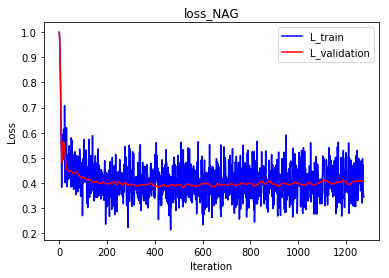

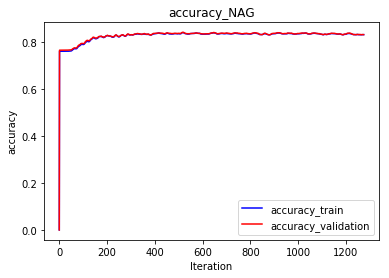

In [2]:
'''NAG'''
lr = 0.007
epoch = 5
gamma = 0.9
lambdal = 0.01
batch_size = 128 # mini-batch gradient descent
runs = math.ceil(X_train.shape[0] / float(batch_size))
iteration = epoch * runs
#Initalize W,set all parameter into zero
W = W_zeros
Loss_train = np.zeros(iteration)
Loss_validation = np.zeros(iteration)
accuracy_train = np.zeros(iteration)
accuracy_validation = np.zeros(iteration)
v_t = np.zeros(N)
for j in range(0,epoch):
    #shuffles the array
    X_random,y_random = shuffle_array(X_train,y_train)
    for l in range(0,runs):
        #get the training instance and label in current batch
        X_batch,y_batch = get_Batch(runs,l,X_random,y_random,batch_size,X_train.shape[0])
        W_0 = W.copy()
        W_0[N-1]= 0
        #approximate W in the next time step
        W_t = W_0 - v_t * gamma
        #the training loss
        Loss_train[j*runs+l] = cal_Loss(X_batch,W,y_batch,lambdal,W_0)
        #the gradient of the loss function
        G = cal_G(X_batch,W_t,y_batch,lambdal,W_0)
        #the validation loss
        Loss_validation[j*runs+l] = cal_Loss(X_validation,W,y_validation,lambdal,W_0)
        #accuracy
        accuracy_train[j*runs+l] = cal_Accuracy(X_train,W,y_train)
        accuracy_validation[j*runs+l] = cal_Accuracy(X_validation,W,y_validation)
        #update the parameter W,b
        v_t = v_t * gamma + G * lr
        W = W - v_t
#draw the result
#loss
plt.figure(1)
plot1,  = plt.plot(np.arange(0, iteration), Loss_train, 'b', label='L_train')
plot2,  = plt.plot(np.arange(0, iteration), Loss_validation, 'r', label='L_validation')
plt.title('loss_NAG')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend([plot1, plot2], ['L_train', 'L_validation'])
plt.show()
#accuracy
plt.figure(2)
plot1, = plt.plot(np.arange(0, iteration), accuracy_train, 'b', label='accuracy_train')
plot2, = plt.plot(np.arange(0, iteration), accuracy_validation, 'r', label='accuracy_validation')
plt.title('accuracy_NAG')
plt.xlabel('Iteration')
plt.ylabel('accuracy')
plt.legend([plot1, plot2], ['accuracy_train', 'accuracy_validation'])
plt.show()

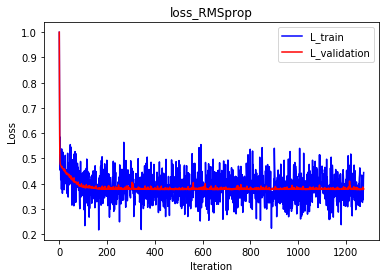

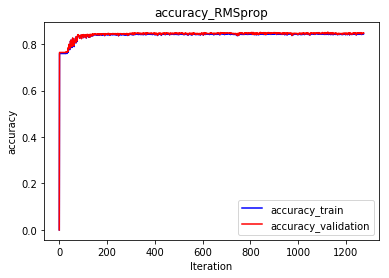

In [3]:
'''RMSprop'''
lr = 0.06
epoch = 5
lambdal = 0.01
epsilon = np.e**(-8)
batch_size = 128 # mini-batch gradient descent
runs = math.ceil(X_train.shape[0] / float(batch_size))
iteration = epoch * runs
#get different kinds of initial data（W_zeros,W_random or W_normal）
W = W_zeros
Loss_train = np.zeros(iteration)
Loss_validation = np.zeros(iteration)
accuracy_train = np.zeros(iteration)
accuracy_validation = np.zeros(iteration)
#the sum of the square of the gradient
G_2 = 0
for j in range(0,epoch):
    #shuffles the array
    X_random,y_random = shuffle_array(X_train,y_train)
    for l in range(0,runs):
        #get the training instance and label in current batch
        X_batch,y_batch = get_Batch(runs,l,X_random,y_random,batch_size,X_train.shape[0])
        W_0 = W.copy()
        W_0[N-1]= 0
        #the training loss
        Loss_train[j*runs+l] = cal_Loss(X_batch,W,y_batch,lambdal,W_0)
        #the gradient of the loss function
        G = cal_G(X_batch,W,y_batch,lambdal,W_0)
        #the validation loss
        Loss_validation[j*runs+l] = cal_Loss(X_validation,W,y_validation,lambdal,W_0)
        #accuracy
        accuracy_train[j*runs+l] = cal_Accuracy(X_train,W,y_train)
        accuracy_validation[j*runs+l] = cal_Accuracy(X_validation,W,y_validation)
        #update the parameter W,b
        G_2 = G_2 * 0.9 + np.dot(G,G.T) * 0.1
        W = W - G *(lr / math.sqrt(G_2 + epsilon))
#draw the result
#loss
plt.figure(1)
plot1,  = plt.plot(np.arange(0, iteration), Loss_train, 'b', label='L_train')
plot2,  = plt.plot(np.arange(0, iteration), Loss_validation, 'r', label='L_validation')
plt.title('loss_RMSprop')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend([plot1, plot2], ['L_train', 'L_validation'])
plt.show()
#accuracy
plt.figure(2)
plot1, = plt.plot(np.arange(0, iteration), accuracy_train, 'b', label='accuracy_train')
plot2, = plt.plot(np.arange(0, iteration), accuracy_validation, 'r', label='accuracy_validation')
plt.title('accuracy_RMSprop')
plt.xlabel('Iteration')
plt.ylabel('accuracy')
plt.legend([plot1, plot2], ['accuracy_train', 'accuracy_validation'])
plt.show()

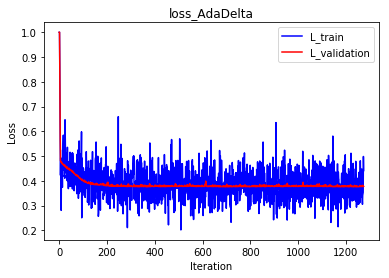

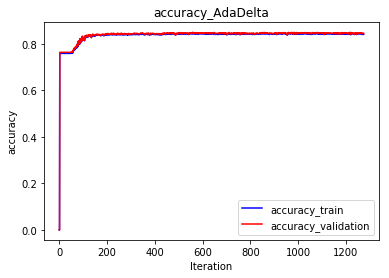

In [4]:
'''AdaDelta'''
lr = 0.04
epoch = 5
lambdal = 0.01
gamma = 0.9
epsilon = np.e**(-8)
batch_size = 128 # mini-batch gradient descent
runs = math.ceil(X_train.shape[0] / float(batch_size))
iteration = epoch * runs
#Initalize W,set all parameter into zero
W = W_zeros
Loss_train = np.zeros(iteration)
Loss_validation = np.zeros(iteration)
accuracy_train = np.zeros(iteration)
accuracy_validation = np.zeros(iteration)
#the sum of the square of the gradient
G_2 = 0
W_2 = 0
RMS_g = 0
RMS_W = 0
W_delta = np.zeros(N)
for j in range(0,epoch):
    #shuffles the array
    X_random,y_random = shuffle_array(X_train,y_train)
    for l in range(0,runs):
        #get the training instance and label in current batch
        X_batch,y_batch = get_Batch(runs,l,X_random,y_random,batch_size,X_train.shape[0])
        W_0 = W.copy()
        W_0[N-1]= 0
        #the training loss
        Loss_train[j*runs+l] = cal_Loss(X_batch,W,y_batch,lambdal,W_0)
        #the gradient of the loss function
        G = cal_G(X_batch,W,y_batch,lambdal,W_0)
        #the validation loss
        Loss_validation[j*runs+l] = cal_Loss(X_validation,W,y_validation,lambdal,W_0)
        #accuracy
        accuracy_train[j*runs+l] = cal_Accuracy(X_train,W,y_train)
        accuracy_validation[j*runs+l] = cal_Accuracy(X_validation,W,y_validation)
        #update the parameter W,b
        G_2 = G_2 * gamma + np.dot(G,G.T) * (1-gamma)
        RMS_g = math.sqrt(G_2 + epsilon)
        W = W - G *(RMS_W / RMS_g)
        W_delta = G *(- lr / RMS_g)
        W_2 = W_2 * gamma + np.dot(W_delta,W_delta.T) * (1-gamma)
        RMS_W = math.sqrt(W_2 + epsilon)
#draw the result
#loss
plt.figure(1)
plot1,  = plt.plot(np.arange(0, iteration), Loss_train, 'b', label='L_train')
plot2,  = plt.plot(np.arange(0, iteration), Loss_validation, 'r', label='L_validation')
plt.title('loss_AdaDelta')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend([plot1, plot2], ['L_train', 'L_validation'])
plt.show()
#accuracy
plt.figure(2)
plot1, = plt.plot(np.arange(0, iteration), accuracy_train, 'b', label='accuracy_train')
plot2, = plt.plot(np.arange(0, iteration), accuracy_validation, 'r', label='accuracy_validation')
plt.title('accuracy_AdaDelta')
plt.xlabel('Iteration')
plt.ylabel('accuracy')
plt.legend([plot1, plot2], ['accuracy_train', 'accuracy_validation'])
plt.show()

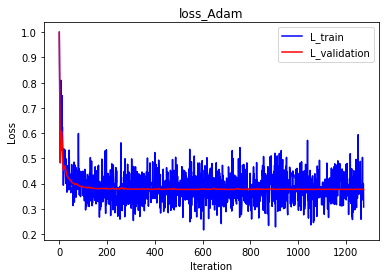

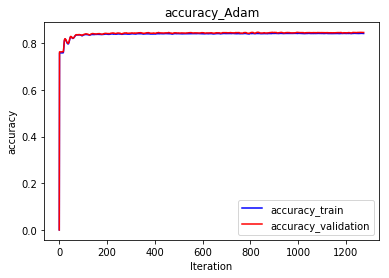

In [5]:
'''Adam'''
lr = 0.07
epoch = 5
lambdal = 0.01
beta1 = 0.9
beta2 =0.999
epsilon = np.e**(-8)
batch_size = 128 # mini-batch gradient descent
runs = math.ceil(X_train.shape[0] / float(batch_size))
iteration = epoch * runs
#Initalize W,set all parameter into zero
W = W_zeros
Loss_train = np.zeros(iteration)
Loss_validation = np.zeros(iteration)
accuracy_train = np.zeros(iteration)
accuracy_validation = np.zeros(iteration)
#the estimates of the first and second moments
m_t = np.zeros(N)
n_t = 0
for j in range(0,epoch):
    #shuffles the array
    X_random,y_random = shuffle_array(X_train,y_train)
    for l in range(0,runs):
        #get the training instance and label in current batch
        X_batch,y_batch = get_Batch(runs,l,X_random,y_random,batch_size,X_train.shape[0])
        W_0 = W.copy()
        W_0[N-1]= 0
        #the training loss
        Loss_train[j*runs+l] = cal_Loss(X_batch,W,y_batch,lambdal,W_0)
        #the gradient of the loss function
        G = cal_G(X_batch,W,y_batch,lambdal,W_0)
        #the validation loss
        Loss_validation[j*runs+l] = cal_Loss(X_validation,W,y_validation,lambdal,W_0)
        #accuracy
        accuracy_train[j*runs+l] = cal_Accuracy(X_train,W,y_train)
        accuracy_validation[j*runs+l] = cal_Accuracy(X_validation,W,y_validation)
        #update the parameter W,b
        m_t = m_t * beta1 + G * (1-beta1)
        n_t = n_t * beta2 + np.dot(G,G.T) * (1-beta2)
        hat_m = m_t * (1/(1-beta1))
        hat_n = n_t * (1/(1-beta2))
        W = W - hat_m * (lr/(math.sqrt(hat_n)+epsilon))
#draw the result
#loss
plt.figure(1)
plot1,  = plt.plot(np.arange(0, iteration), Loss_train, 'b', label='L_train')
plot2,  = plt.plot(np.arange(0, iteration), Loss_validation, 'r', label='L_validation')
plt.title('loss_Adam')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend([plot1, plot2], ['L_train', 'L_validation'])
plt.show()
#accuracy
plt.figure(2)
plot1, = plt.plot(np.arange(0, iteration), accuracy_train, 'b', label='accuracy_train')
plot2, = plt.plot(np.arange(0, iteration), accuracy_validation, 'r', label='accuracy_validation')
plt.title('accuracy_Adam')
plt.xlabel('Iteration')
plt.ylabel('accuracy')
plt.legend([plot1, plot2], ['accuracy_train', 'accuracy_validation'])
plt.show()